In [1]:
# Install packages not available in the docker image
!pip install psycopg2-binary==2.9.3

In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_precision_recall_curve, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(12,8)})

In [3]:
# Create connection based on environment variables defined at docker-compose.yml
conn_url = "postgresql+psycopg2://%s:%s@db:5432/%s" % (
    os.environ["POSTGRES_USER"],
    os.environ["POSTGRES_PASSWORD"],
    os.environ["POSTGRES_DB"]
)
engine = create_engine(conn_url, isolation_level="AUTOCOMMIT")

### Show available datasets

In [4]:
from IPython.display import Markdown, display

dfs = {}
with engine.begin() as connection:
    for tbl in ["buyers", "merchants", "orders_creation", "orders_decision", "orders_payment", "datasets"]:
        df = pd.read_sql(f"SELECT * FROM {tbl}", connection)
        index_col = next(c for c in df if c.endswith("_id"))
        dfs[tbl] = df.set_index(index_col)
        
        display(Markdown(f"**{tbl}**"))
        display(dfs[tbl].head(n=10))

**buyers**

,first_name,last_name,email,created_at
buyer_id,,,,
1,Felicitas,Dowerg,weinhagekarl-heinz@example.org,2019-01-05 16:03:48.065322
2,Hellmuth,Etzold,stiffeljohanne@example.net,2019-01-06 02:18:23.014051
3,Dieter,Scheel,bbeckmann@example.org,2019-01-06 18:14:18.912525
4,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542
5,Friedlinde,Trapp,chartmann@example.net,2019-01-08 10:44:52.550876
6,Karl-Hans,Albers,hildaloeffler@example.com,2019-01-08 17:48:44.117045
7,Karl-Hans,Förster,vanessawilms@example.com,2019-01-10 16:08:24.980765
8,Edmund,Davids,wdietz@example.com,2019-01-12 15:39:50.044459
9,Dörte,Hettner,wagnervalerij@example.net,2019-01-13 09:43:09.301140


**merchants**

,name,created_at
merchant_id,,
1,Dowerg,2019-01-01 18:36:21.374000
2,Weinhage GbR,2019-01-30 18:17:05.389742
3,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632
4,Dobes,2019-03-10 12:02:26.723510
5,Weinhage,2019-03-15 18:53:56.577648
6,Christoph,2019-04-11 11:14:38.032554
7,Löffler,2019-04-23 09:05:19.099020
8,Becker AG,2019-04-24 14:47:02.835260
9,Heintze GmbH & Co. OHG,2019-06-23 06:27:02.565517


**orders_creation**

,buyer_id,merchant_id,total_price_cents,created_at
order_id,,,,
1,1,1,36995,2019-01-05 16:03:48.065322
2,2,1,46197,2019-01-06 02:18:23.014051
3,3,1,37392,2019-01-06 18:14:18.912525
4,4,1,34974,2019-01-07 23:18:11.857542
5,5,1,41176,2019-01-08 10:44:52.550876
6,6,1,31138,2019-01-08 17:48:44.117045
7,5,1,44352,2019-01-09 00:17:37.327339
8,7,1,35963,2019-01-10 16:08:24.980765
9,6,1,52109,2019-01-10 17:15:11.111957


**orders_decision**

,decision,due_date,created_at
order_id,,,
1,ACCEPT,2019-02-04 16:03:48.248094,2019-01-05 16:03:48.248094
2,ACCEPT,2019-02-05 02:18:23.093798,2019-01-06 02:18:23.093798
3,ACCEPT,2019-02-05 18:14:19.026141,2019-01-06 18:14:19.026141
4,ACCEPT,2019-02-06 23:18:11.898825,2019-01-07 23:18:11.898825
5,ACCEPT,2019-02-07 10:44:52.943724,2019-01-08 10:44:52.943724
6,ACCEPT,2019-02-07 17:48:44.200912,2019-01-08 17:48:44.200912
7,ACCEPT,2019-02-08 00:17:37.363524,2019-01-09 00:17:37.363524
8,ACCEPT,2019-02-09 16:08:25.024673,2019-01-10 16:08:25.024673
9,ACCEPT,2019-02-09 17:15:11.205784,2019-01-10 17:15:11.205784


**orders_payment**

,created_at
order_id,
1,2019-02-10 08:16:48.757377
2,2019-02-07 10:43:44.381343
3,2019-02-01 04:58:48.207862
4,2019-02-07 12:06:58.226781
5,2019-02-06 03:41:38.824075
6,2019-02-11 02:17:47.622723
7,2019-02-07 19:46:51.983749
8,2019-02-08 19:50:00.076555
9,2019-02-04 17:07:21.860173


**datasets**

,dataset_type
order_id,
1,train
2,train
3,train
4,train
5,train
6,train
7,train
8,train
9,train


In [5]:
dfs['orders_creation']

,buyer_id,merchant_id,total_price_cents,created_at
order_id,,,,
1,1,1,36995,2019-01-05 16:03:48.065322
2,2,1,46197,2019-01-06 02:18:23.014051
3,3,1,37392,2019-01-06 18:14:18.912525
4,4,1,34974,2019-01-07 23:18:11.857542
5,5,1,41176,2019-01-08 10:44:52.550876
...,...,...,...,...
80343,4725,23,202679,2022-02-27 07:58:03.883121
80344,6934,75,16162,2022-02-27 19:02:59.164577
80345,6648,41,20557,2022-02-27 22:47:24.582462


In [6]:
df_orders = dfs['orders_creation'].reset_index().merge(dfs['orders_decision'], on='order_id', suffixes=[None,'_decision'])

In [7]:
df_orders.head()

,order_id,buyer_id,merchant_id,total_price_cents,created_at,decision,due_date,created_at_decision
0,1,1,1,36995,2019-01-05 16:03:48.065322,ACCEPT,2019-02-04 16:03:48.248094,2019-01-05 16:03:48.248094
1,2,2,1,46197,2019-01-06 02:18:23.014051,ACCEPT,2019-02-05 02:18:23.093798,2019-01-06 02:18:23.093798
2,3,3,1,37392,2019-01-06 18:14:18.912525,ACCEPT,2019-02-05 18:14:19.026141,2019-01-06 18:14:19.026141
3,4,4,1,34974,2019-01-07 23:18:11.857542,ACCEPT,2019-02-06 23:18:11.898825,2019-01-07 23:18:11.898825
4,5,5,1,41176,2019-01-08 10:44:52.550876,ACCEPT,2019-02-07 10:44:52.943724,2019-01-08 10:44:52.943724


In [8]:
df = df_orders.merge(dfs["buyers"], on="buyer_id", suffixes=[None,'_buyer'])

In [9]:
df.head()

,order_id,buyer_id,merchant_id,total_price_cents,created_at,decision,due_date,created_at_decision,first_name,last_name,email,created_at_buyer
0,1,1,1,36995,2019-01-05 16:03:48.065322,ACCEPT,2019-02-04 16:03:48.248094,2019-01-05 16:03:48.248094,Felicitas,Dowerg,weinhagekarl-heinz@example.org,2019-01-05 16:03:48.065322
1,2,2,1,46197,2019-01-06 02:18:23.014051,ACCEPT,2019-02-05 02:18:23.093798,2019-01-06 02:18:23.093798,Hellmuth,Etzold,stiffeljohanne@example.net,2019-01-06 02:18:23.014051
2,3,3,1,37392,2019-01-06 18:14:18.912525,ACCEPT,2019-02-05 18:14:19.026141,2019-01-06 18:14:19.026141,Dieter,Scheel,bbeckmann@example.org,2019-01-06 18:14:18.912525
3,4,4,1,34974,2019-01-07 23:18:11.857542,ACCEPT,2019-02-06 23:18:11.898825,2019-01-07 23:18:11.898825,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542
4,32,4,1,45097,2019-01-22 10:02:05.061126,ACCEPT,2019-02-21 10:02:05.095421,2019-01-22 10:02:05.095421,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542


In [10]:
df.groupby(["buyer_id"])["created_at_buyer"].nunique().value_counts()

1    10000
Name: created_at_buyer, dtype: int64

In [11]:
df = df.merge(dfs["merchants"], on="merchant_id",  suffixes=[None,'_merchant'])

In [12]:
df.head()

,order_id,buyer_id,merchant_id,total_price_cents,created_at,decision,due_date,created_at_decision,first_name,last_name,email,created_at_buyer,name,created_at_merchant
0,1,1,1,36995,2019-01-05 16:03:48.065322,ACCEPT,2019-02-04 16:03:48.248094,2019-01-05 16:03:48.248094,Felicitas,Dowerg,weinhagekarl-heinz@example.org,2019-01-05 16:03:48.065322,Dowerg,2019-01-01 18:36:21.374
1,2,2,1,46197,2019-01-06 02:18:23.014051,ACCEPT,2019-02-05 02:18:23.093798,2019-01-06 02:18:23.093798,Hellmuth,Etzold,stiffeljohanne@example.net,2019-01-06 02:18:23.014051,Dowerg,2019-01-01 18:36:21.374
2,3,3,1,37392,2019-01-06 18:14:18.912525,ACCEPT,2019-02-05 18:14:19.026141,2019-01-06 18:14:19.026141,Dieter,Scheel,bbeckmann@example.org,2019-01-06 18:14:18.912525,Dowerg,2019-01-01 18:36:21.374
3,4,4,1,34974,2019-01-07 23:18:11.857542,ACCEPT,2019-02-06 23:18:11.898825,2019-01-07 23:18:11.898825,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374
4,32,4,1,45097,2019-01-22 10:02:05.061126,ACCEPT,2019-02-21 10:02:05.095421,2019-01-22 10:02:05.095421,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374


In [13]:
dfs["orders_payment"].reset_index()

,order_id,created_at
0,1,2019-02-10 08:16:48.757377
1,2,2019-02-07 10:43:44.381343
2,3,2019-02-01 04:58:48.207862
3,4,2019-02-07 12:06:58.226781
4,5,2019-02-06 03:41:38.824075
...,...,...
77576,80343,2022-04-05 21:47:48.255842
77577,80344,2022-03-31 16:02:42.905176
77578,80345,2022-03-30 08:20:14.289003
77579,80346,2022-03-29 02:09:20.826259


In [14]:
df.merge(dfs["orders_payment"].reset_index(), on="order_id",  suffixes=[None,'_payment'], how='outer')

,order_id,buyer_id,merchant_id,total_price_cents,created_at,decision,due_date,created_at_decision,first_name,last_name,email,created_at_buyer,name,created_at_merchant,created_at_payment
0,1,1,1,36995,2019-01-05 16:03:48.065322,ACCEPT,2019-02-04 16:03:48.248094,2019-01-05 16:03:48.248094,Felicitas,Dowerg,weinhagekarl-heinz@example.org,2019-01-05 16:03:48.065322,Dowerg,2019-01-01 18:36:21.374000,2019-02-10 08:16:48.757377
1,2,2,1,46197,2019-01-06 02:18:23.014051,ACCEPT,2019-02-05 02:18:23.093798,2019-01-06 02:18:23.093798,Hellmuth,Etzold,stiffeljohanne@example.net,2019-01-06 02:18:23.014051,Dowerg,2019-01-01 18:36:21.374000,2019-02-07 10:43:44.381343
2,3,3,1,37392,2019-01-06 18:14:18.912525,ACCEPT,2019-02-05 18:14:19.026141,2019-01-06 18:14:19.026141,Dieter,Scheel,bbeckmann@example.org,2019-01-06 18:14:18.912525,Dowerg,2019-01-01 18:36:21.374000,2019-02-01 04:58:48.207862
3,4,4,1,34974,2019-01-07 23:18:11.857542,ACCEPT,2019-02-06 23:18:11.898825,2019-01-07 23:18:11.898825,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374000,2019-02-07 12:06:58.226781
4,32,4,1,45097,2019-01-22 10:02:05.061126,ACCEPT,2019-02-21 10:02:05.095421,2019-01-22 10:02:05.095421,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374000,2019-02-26 10:45:24.446596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80342,77066,9790,95,95639,2021-12-17 13:55:45.248033,ACCEPT,2022-01-16 13:55:45.505110,2021-12-17 13:55:45.505110,Daniel,Heinz,elwirajaehn@example.org,2021-12-17 13:55:45.248033,Mülichen,2021-10-28 09:46:55.135219,2022-01-21 13:02:49.228806
80343,77621,9855,88,102636,2021-12-21 10:19:20.183957,ACCEPT,2022-01-20 10:19:20.276381,2021-12-21 10:19:20.276381,Ernst-August,Hendriks,gumprichfriedhelm@example.net,2021-12-21 10:19:20.183957,Boucsein Stiftung & Co. KG,2021-10-04 13:29:09.728608,2022-01-21 13:48:50.636718
80344,79910,9855,88,152282,2022-01-13 10:36:40.959912,ACCEPT,2022-02-12 10:36:41.007623,2022-01-13 10:36:41.007623,Ernst-August,Hendriks,gumprichfriedhelm@example.net,2021-12-21 10:19:20.183957,Boucsein Stiftung & Co. KG,2021-10-04 13:29:09.728608,2022-02-11 20:56:08.606545
80345,78811,9970,100,33102,2021-12-30 00:44:42.990116,ACCEPT,2022-01-29 00:44:43.077706,2021-12-30 00:44:43.077706,Amelie,Fröhlich,muellerluzie@example.org,2021-12-30 00:44:42.990116,Bloch,2021-12-26 09:38:58.983800,2022-01-26 15:17:46.043839


In [15]:
df = df.merge(dfs["orders_payment"].reset_index(), on="order_id",  suffixes=[None,'_payment'], how='outer')

In [16]:
df

,order_id,buyer_id,merchant_id,total_price_cents,created_at,decision,due_date,created_at_decision,first_name,last_name,email,created_at_buyer,name,created_at_merchant,created_at_payment
0,1,1,1,36995,2019-01-05 16:03:48.065322,ACCEPT,2019-02-04 16:03:48.248094,2019-01-05 16:03:48.248094,Felicitas,Dowerg,weinhagekarl-heinz@example.org,2019-01-05 16:03:48.065322,Dowerg,2019-01-01 18:36:21.374000,2019-02-10 08:16:48.757377
1,2,2,1,46197,2019-01-06 02:18:23.014051,ACCEPT,2019-02-05 02:18:23.093798,2019-01-06 02:18:23.093798,Hellmuth,Etzold,stiffeljohanne@example.net,2019-01-06 02:18:23.014051,Dowerg,2019-01-01 18:36:21.374000,2019-02-07 10:43:44.381343
2,3,3,1,37392,2019-01-06 18:14:18.912525,ACCEPT,2019-02-05 18:14:19.026141,2019-01-06 18:14:19.026141,Dieter,Scheel,bbeckmann@example.org,2019-01-06 18:14:18.912525,Dowerg,2019-01-01 18:36:21.374000,2019-02-01 04:58:48.207862
3,4,4,1,34974,2019-01-07 23:18:11.857542,ACCEPT,2019-02-06 23:18:11.898825,2019-01-07 23:18:11.898825,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374000,2019-02-07 12:06:58.226781
4,32,4,1,45097,2019-01-22 10:02:05.061126,ACCEPT,2019-02-21 10:02:05.095421,2019-01-22 10:02:05.095421,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374000,2019-02-26 10:45:24.446596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80342,77066,9790,95,95639,2021-12-17 13:55:45.248033,ACCEPT,2022-01-16 13:55:45.505110,2021-12-17 13:55:45.505110,Daniel,Heinz,elwirajaehn@example.org,2021-12-17 13:55:45.248033,Mülichen,2021-10-28 09:46:55.135219,2022-01-21 13:02:49.228806
80343,77621,9855,88,102636,2021-12-21 10:19:20.183957,ACCEPT,2022-01-20 10:19:20.276381,2021-12-21 10:19:20.276381,Ernst-August,Hendriks,gumprichfriedhelm@example.net,2021-12-21 10:19:20.183957,Boucsein Stiftung & Co. KG,2021-10-04 13:29:09.728608,2022-01-21 13:48:50.636718
80344,79910,9855,88,152282,2022-01-13 10:36:40.959912,ACCEPT,2022-02-12 10:36:41.007623,2022-01-13 10:36:41.007623,Ernst-August,Hendriks,gumprichfriedhelm@example.net,2021-12-21 10:19:20.183957,Boucsein Stiftung & Co. KG,2021-10-04 13:29:09.728608,2022-02-11 20:56:08.606545
80345,78811,9970,100,33102,2021-12-30 00:44:42.990116,ACCEPT,2022-01-29 00:44:43.077706,2021-12-30 00:44:43.077706,Amelie,Fröhlich,muellerluzie@example.org,2021-12-30 00:44:42.990116,Bloch,2021-12-26 09:38:58.983800,2022-01-26 15:17:46.043839


In [17]:
df[df.order_id==154]

,order_id,buyer_id,merchant_id,total_price_cents,created_at,decision,due_date,created_at_decision,first_name,last_name,email,created_at_buyer,name,created_at_merchant,created_at_payment
232,154,15,1,43698,2019-02-23 02:57:28.040635,REJECT,NaT,2019-02-23 02:57:28.090948,Antoinette,Wagner,gottliebmitschke@example.com,2019-01-19 07:15:07.407308,Dowerg,2019-01-01 18:36:21.374,NaT


In [18]:
df = df.merge(dfs["datasets"].reset_index(), on="order_id")

In [19]:
df[df.order_id==154]

,order_id,buyer_id,merchant_id,total_price_cents,created_at,decision,due_date,created_at_decision,first_name,last_name,email,created_at_buyer,name,created_at_merchant,created_at_payment,dataset_type
232,154,15,1,43698,2019-02-23 02:57:28.040635,REJECT,NaT,2019-02-23 02:57:28.090948,Antoinette,Wagner,gottliebmitschke@example.com,2019-01-19 07:15:07.407308,Dowerg,2019-01-01 18:36:21.374,NaT,train


In [20]:
df.decision.value_counts(normalize=True)

ACCEPT    0.978755
REJECT    0.021245
Name: decision, dtype: float64

In [21]:
df = df[df.decision!= "REJECT"].drop(columns=["decision", "created_at_decision"])

In [22]:
df.groupby("buyer_id").filter(lambda x: len(x)==10).buyer_id.unique()

array([  60,  736, 4217,  144,  177,  321,  339,  375,  537,  604, 1276,
       4755, 5097, 5455, 5632, 5812, 7544,  230, 1143, 1643, 1687, 3184,
       4592,  353,  584,  682, 1139, 1674, 6925,  354,  475, 3759, 4977,
       7269,  777, 1121, 1130, 1274, 3930, 4290, 4760, 4861, 7069, 7292,
       7532,  987, 1764, 1860, 2211, 2821, 5186, 5800,  947, 1362, 1552,
       1761, 2494, 3072, 3484, 4307, 4484, 4605, 5775, 6284, 1136, 5517,
       1042, 1908, 2084, 2362, 5103, 5182, 7091, 8083, 8677, 9416, 2285,
       4284, 9586, 1401, 2369, 3797, 4391, 6663, 9055, 2068, 2100, 2161,
       4218, 7290, 2289, 4725, 5545, 6502, 7298, 8487, 1969, 3961, 4831,
       7732, 9172, 2258, 4432, 3037, 2458, 5019, 5431, 5641, 6840, 7740,
       2535, 3052, 3768, 5296, 5378, 8270, 8457, 2745, 3352, 5466, 6133,
       6590, 6666, 7256, 7664, 8498, 9146, 2669, 3046, 3069, 4709, 4863,
       5173, 5495, 7080, 7289, 7460, 7476, 8582, 8969, 2788, 4210, 4514,
       4546, 6026, 6122, 8137, 8183, 9235, 5742, 60

In [23]:
df[df.buyer_id==375]

,order_id,buyer_id,merchant_id,total_price_cents,created_at,due_date,first_name,last_name,email,created_at_buyer,name,created_at_merchant,created_at_payment,dataset_type
3611,1264,375,3,43210,2019-05-29 19:14:39.423371,2019-06-28 19:14:39.597090,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-06-27 16:01:36.470346,train
3612,1300,375,3,51506,2019-06-01 00:41:55.019492,2019-07-01 00:41:55.389054,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-06-27 13:07:33.652447,train
3613,1384,375,3,45141,2019-06-06 06:31:15.666058,2019-07-06 06:31:15.734566,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-07-05 20:33:21.946271,train
3614,1440,375,3,44622,2019-06-09 11:57:12.683107,2019-07-09 11:57:12.887200,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-07-10 18:47:15.624795,train
3615,1513,375,3,41833,2019-06-12 18:03:54.121526,2019-07-12 18:03:54.151647,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-07-14 17:34:46.612663,train
3616,1682,375,3,63112,2019-06-20 07:24:09.406070,2019-07-20 07:24:09.414477,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-07-19 21:36:16.819275,train
3617,1823,375,3,75425,2019-06-26 17:10:09.317990,2019-07-26 17:10:09.330666,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-07-26 11:56:12.343557,train
3618,2026,375,3,61336,2019-07-05 23:08:14.148086,2019-08-04 23:08:14.171084,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-08-08 10:17:05.928721,train
3619,2148,375,3,71940,2019-07-10 21:00:41.220998,2019-08-09 21:00:41.223093,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-08-06 04:47:28.082991,train
3620,2164,375,3,47761,2019-07-11 23:59:02.061964,2019-08-10 23:59:02.098797,Evelyne,Röhrdanz,fatih49@example.net,2019-05-29 19:14:39.423371,Hauffer AG & Co. KG,2019-03-08 06:13:25.480632,2019-08-06 00:48:53.024973,train


In [24]:
df[df.buyer_id == 9214]

,order_id,buyer_id,merchant_id,total_price_cents,created_at,due_date,first_name,last_name,email,created_at_buyer,name,created_at_merchant,created_at_payment,dataset_type
80307,71607,9214,85,251057,2021-11-09 22:04:49.932750,2021-12-09 22:04:49.994654,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2021-12-10 20:56:25.015066,train
80308,72188,9214,85,240266,2021-11-13 21:28:34.699393,2021-12-13 21:28:34.934809,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2021-12-14 03:58:06.889571,train
80309,74743,9214,85,200764,2021-12-01 02:09:50.217274,2021-12-31 02:09:50.256507,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2021-12-31 17:05:34.412788,train
80310,75147,9214,85,152908,2021-12-03 22:45:53.599286,2022-01-02 22:45:53.789525,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2022-01-05 06:16:15.641094,train
80311,76781,9214,85,259593,2021-12-15 08:39:58.268860,2022-01-14 08:39:58.270670,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2022-01-14 19:12:21.218537,train
80312,77997,9214,85,167897,2021-12-23 22:26:45.546584,2022-01-22 22:26:45.753808,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2022-01-26 16:00:32.832681,train
80313,78001,9214,85,247543,2021-12-23 23:54:51.190913,2022-01-22 23:54:51.338691,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2022-01-19 09:47:58.219503,train
80314,78249,9214,85,179469,2021-12-25 21:15:33.441991,2022-01-24 21:15:33.694572,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2022-01-26 11:41:38.965638,train
80315,78727,9214,85,263825,2021-12-29 09:55:19.181863,2022-01-28 09:55:19.233362,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2022-01-22 16:39:29.405748,train
80316,79365,9214,85,177782,2022-01-03 17:27:28.659693,2022-02-02 17:27:28.679237,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,Hecker AG,2021-08-25 06:13:38.177492,2022-01-31 06:37:10.273782,test


In [25]:
df.head()

,order_id,buyer_id,merchant_id,total_price_cents,created_at,due_date,first_name,last_name,email,created_at_buyer,name,created_at_merchant,created_at_payment,dataset_type
0,1,1,1,36995,2019-01-05 16:03:48.065322,2019-02-04 16:03:48.248094,Felicitas,Dowerg,weinhagekarl-heinz@example.org,2019-01-05 16:03:48.065322,Dowerg,2019-01-01 18:36:21.374,2019-02-10 08:16:48.757377,train
1,2,2,1,46197,2019-01-06 02:18:23.014051,2019-02-05 02:18:23.093798,Hellmuth,Etzold,stiffeljohanne@example.net,2019-01-06 02:18:23.014051,Dowerg,2019-01-01 18:36:21.374,2019-02-07 10:43:44.381343,train
2,3,3,1,37392,2019-01-06 18:14:18.912525,2019-02-05 18:14:19.026141,Dieter,Scheel,bbeckmann@example.org,2019-01-06 18:14:18.912525,Dowerg,2019-01-01 18:36:21.374,2019-02-01 04:58:48.207862,train
3,4,4,1,34974,2019-01-07 23:18:11.857542,2019-02-06 23:18:11.898825,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374,2019-02-07 12:06:58.226781,train
4,32,4,1,45097,2019-01-22 10:02:05.061126,2019-02-21 10:02:05.095421,Heinz-Jürgen,Heintze,rosehans-uwe@example.net,2019-01-07 23:18:11.857542,Dowerg,2019-01-01 18:36:21.374,2019-02-26 10:45:24.446596,train


In [26]:
df.columns

Index(['order_id', 'buyer_id', 'merchant_id', 'total_price_cents',
       'created_at', 'due_date', 'first_name', 'last_name', 'email',
       'created_at_buyer', 'name', 'created_at_merchant', 'created_at_payment',
       'dataset_type'],
      dtype='object')

In [27]:
df[["due_date", "created_at_payment"]]

,due_date,created_at_payment
0,2019-02-04 16:03:48.248094,2019-02-10 08:16:48.757377
1,2019-02-05 02:18:23.093798,2019-02-07 10:43:44.381343
2,2019-02-05 18:14:19.026141,2019-02-01 04:58:48.207862
3,2019-02-06 23:18:11.898825,2019-02-07 12:06:58.226781
4,2019-02-21 10:02:05.095421,2019-02-26 10:45:24.446596
...,...,...
80342,2022-01-16 13:55:45.505110,2022-01-21 13:02:49.228806
80343,2022-01-20 10:19:20.276381,2022-01-21 13:48:50.636718
80344,2022-02-12 10:36:41.007623,2022-02-11 20:56:08.606545
80345,2022-01-29 00:44:43.077706,2022-01-26 15:17:46.043839


In [28]:
df[["created_at_payment", "due_date"]]

,created_at_payment,due_date
0,2019-02-10 08:16:48.757377,2019-02-04 16:03:48.248094
1,2019-02-07 10:43:44.381343,2019-02-05 02:18:23.093798
2,2019-02-01 04:58:48.207862,2019-02-05 18:14:19.026141
3,2019-02-07 12:06:58.226781,2019-02-06 23:18:11.898825
4,2019-02-26 10:45:24.446596,2019-02-21 10:02:05.095421
...,...,...
80342,2022-01-21 13:02:49.228806,2022-01-16 13:55:45.505110
80343,2022-01-21 13:48:50.636718,2022-01-20 10:19:20.276381
80344,2022-02-11 20:56:08.606545,2022-02-12 10:36:41.007623
80345,2022-01-26 15:17:46.043839,2022-01-29 00:44:43.077706


In [29]:
(df["created_at_payment"] - df["due_date"]).dt.days

0        5.0
1        2.0
2       -5.0
3        0.0
4        5.0
        ... 
80342    4.0
80343    1.0
80344   -1.0
80345   -3.0
80346    2.0
Length: 78640, dtype: float64

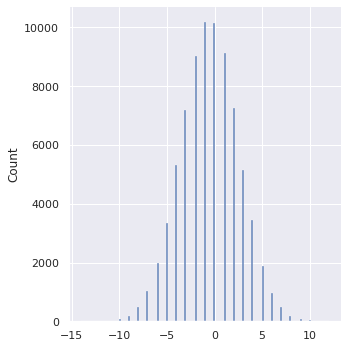

In [30]:
sns.displot((df["created_at_payment"] - df["due_date"]).dt.days)

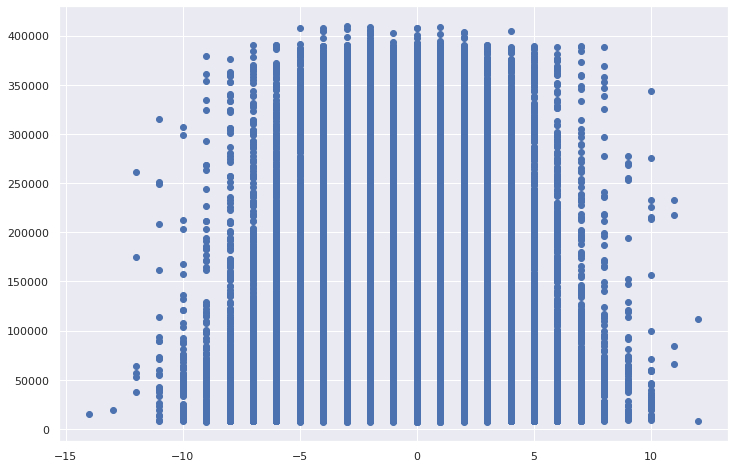

In [31]:
plt.scatter((df["created_at_payment"] - df["due_date"]).dt.days, df["total_price_cents"])
plt.show()

In [32]:
df['target'] = np.where((df["created_at_payment"] - df["due_date"]).dt.days < 5, 0, 1 ) 

In [33]:
df.columns

Index(['order_id', 'buyer_id', 'merchant_id', 'total_price_cents',
       'created_at', 'due_date', 'first_name', 'last_name', 'email',
       'created_at_buyer', 'name', 'created_at_merchant', 'created_at_payment',
       'dataset_type', 'target'],
      dtype='object')

In [34]:
(df["created_at"] - df["created_at_merchant"])

0         3 days 21:27:26.691322
1         4 days 07:42:01.640051
2         4 days 23:37:57.538525
3         6 days 04:41:50.483542
4        20 days 15:25:43.687126
                  ...           
80342    50 days 04:08:50.112814
80343    77 days 20:50:10.455349
80344   100 days 21:07:31.231304
80345     3 days 15:05:44.006316
80346    25 days 22:10:55.318159
Length: 78640, dtype: timedelta64[ns]

In [35]:
df["time_buyer"] = (df["created_at"] - df["created_at_buyer"]).dt.days
df["time_merchant"] = (df["created_at"] - df["created_at_merchant"]).dt.days
df["has_order_before"] = df["time_buyer"].apply(lambda x: 0 if x==0 else 1)

df["created_at_day"] = df["created_at"].dt.day
df["created_at_dayweek"] = df["created_at"].dt.dayofweek
df["created_at_time"] = df["created_at"].dt.hour + (df["created_at"].dt.minute/60)

In [36]:
corr = df.drop(columns="order_id").corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,buyer_id,merchant_id,total_price_cents,target,time_buyer,time_merchant,has_order_before,created_at_day,created_at_dayweek,created_at_time
buyer_id,1.000,0.662,0.048,0.005,-0.354,0.266,-0.108,0.010,-0.004,-0.002
merchant_id,0.662,1.000,0.053,0.001,-0.231,-0.332,-0.062,0.004,0.000,-0.003
total_price_cents,0.048,0.053,1.000,0.000,-0.004,0.006,-0.000,0.005,-0.001,0.002
target,0.005,0.001,0.000,1.000,-0.037,-0.021,-0.033,0.003,-0.004,-0.001
time_buyer,-0.354,-0.231,-0.004,-0.037,1.000,0.521,0.305,-0.003,-0.003,-0.001
time_merchant,0.266,-0.332,0.006,-0.021,0.521,1.000,0.162,0.004,-0.006,0.001
has_order_before,-0.108,-0.062,-0.000,-0.033,0.305,0.162,1.000,-0.009,0.002,0.005
created_at_day,0.010,0.004,0.005,0.003,-0.003,0.004,-0.009,1.000,0.001,0.001
created_at_dayweek,-0.004,0.000,-0.001,-0.004,-0.003,-0.006,0.002,0.001,1.000,0.005
created_at_time,-0.002,-0.003,0.002,-0.001,-0.001,0.001,0.005,0.001,0.005,1.000


In [37]:
df_1 = df.copy()

In [38]:
df_1.sort_values(['created_at']).groupby('buyer_id')['total_price_cents'].mean()

buyer_id
1         36995.000000
2         46197.000000
3         37392.000000
4         41024.952381
5         42764.000000
             ...      
9996     351027.500000
9997     170483.000000
9998      48895.500000
9999       9017.500000
10000     27976.500000
Name: total_price_cents, Length: 9763, dtype: float64

In [39]:
df_1[df_1.buyer_id == 9214].sort_values(['created_at']).groupby('buyer_id')['email'].nunique()

buyer_id
9214    1
Name: email, dtype: int64

In [40]:
df_1.sort_values(['created_at']).groupby('buyer_id')['total_price_cents'].apply(lambda x: x.expanding().mean().shift()).fillna(-1)

0            -1.000000
1            -1.000000
2            -1.000000
3            -1.000000
171          -1.000000
             ...      
38018    180071.222222
77605     17243.500000
58457     16510.333333
56936     10479.833333
72099     30318.500000
Name: total_price_cents, Length: 78640, dtype: float64

In [41]:
df_1.groupby(["buyer_id"]).agg({"email": pd.Series.nunique})["email"].value_counts()

1    9763
Name: email, dtype: int64

In [42]:
df_1.groupby(["buyer_id"]).agg({"first_name": pd.Series.nunique})["first_name"].value_counts()

1    9763
Name: first_name, dtype: int64

In [43]:
df_1.groupby(["buyer_id"]).agg({"last_name": pd.Series.nunique})["last_name"].value_counts()

1    9763
Name: last_name, dtype: int64

In [44]:
df_1["n_orders_buyer"] = df_1.groupby('buyer_id')['created_at'].rank(ascending=True).astype(int) - 1
df_1["n_orders_merchant"] = df_1.groupby('merchant_id')['created_at'].rank(ascending=True).astype(int) - 1

df_1["days_since_last_order"] = df_1.sort_values(['created_at']).groupby('buyer_id')['created_at'].diff().dt.days.fillna(-1)
df_1["avg_price"] = df_1.sort_values(['created_at']).groupby('buyer_id')['total_price_cents'].apply(lambda x: x.expanding().mean().shift()).fillna(-1)
df_1["max_price"] = df_1.sort_values(['created_at']).groupby('buyer_id')['total_price_cents'].apply(lambda x: x.expanding().max().shift()).fillna(-1)
df_1["min_price"] = df_1.sort_values(['created_at']).groupby('buyer_id')['total_price_cents'].apply(lambda x: x.expanding().min().shift()).fillna(-1)

In [45]:
df_1[df_1.buyer_id == 9214]

,order_id,buyer_id,merchant_id,total_price_cents,created_at,due_date,first_name,last_name,email,created_at_buyer,...,has_order_before,created_at_day,created_at_dayweek,created_at_time,n_orders_buyer,n_orders_merchant,days_since_last_order,avg_price,max_price,min_price
80307,71607,9214,85,251057,2021-11-09 22:04:49.932750,2021-12-09 22:04:49.994654,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,0,9,1,22.066667,0,0,-1.0,-1.000000,-1.0,-1.0
80308,72188,9214,85,240266,2021-11-13 21:28:34.699393,2021-12-13 21:28:34.934809,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,13,5,21.466667,1,1,3.0,251057.000000,251057.0,251057.0
80309,74743,9214,85,200764,2021-12-01 02:09:50.217274,2021-12-31 02:09:50.256507,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,1,2,2.150000,2,3,17.0,245661.500000,251057.0,240266.0
80310,75147,9214,85,152908,2021-12-03 22:45:53.599286,2022-01-02 22:45:53.789525,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,3,4,22.750000,3,4,2.0,230695.666667,251057.0,200764.0
80311,76781,9214,85,259593,2021-12-15 08:39:58.268860,2022-01-14 08:39:58.270670,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,15,2,8.650000,4,6,11.0,211248.750000,251057.0,152908.0
80312,77997,9214,85,167897,2021-12-23 22:26:45.546584,2022-01-22 22:26:45.753808,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,23,3,22.433333,5,7,8.0,220917.600000,259593.0,152908.0
80313,78001,9214,85,247543,2021-12-23 23:54:51.190913,2022-01-22 23:54:51.338691,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,23,3,23.900000,6,8,0.0,212080.833333,259593.0,152908.0
80314,78249,9214,85,179469,2021-12-25 21:15:33.441991,2022-01-24 21:15:33.694572,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,25,5,21.250000,7,9,1.0,217146.857143,259593.0,152908.0
80315,78727,9214,85,263825,2021-12-29 09:55:19.181863,2022-01-28 09:55:19.233362,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,29,2,9.916667,8,11,3.0,212437.125000,259593.0,152908.0
80316,79365,9214,85,177782,2022-01-03 17:27:28.659693,2022-02-02 17:27:28.679237,Xenia,Heß,karinaladeck@example.com,2021-11-09 22:04:49.932750,...,1,3,0,17.450000,9,12,5.0,218146.888889,263825.0,152908.0


In [46]:
corr = df_1.drop(columns="order_id").corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,buyer_id,merchant_id,total_price_cents,target,time_buyer,time_merchant,has_order_before,created_at_day,created_at_dayweek,created_at_time,n_orders_buyer,n_orders_merchant,days_since_last_order,avg_price,max_price,min_price
buyer_id,1.000,0.662,0.048,0.005,-0.354,0.266,-0.108,0.010,-0.004,-0.002,-0.240,0.082,-0.056,0.010,-0.005,0.032
merchant_id,0.662,1.000,0.053,0.001,-0.231,-0.332,-0.062,0.004,0.000,-0.003,-0.156,-0.308,-0.033,0.024,0.015,0.041
total_price_cents,0.048,0.053,1.000,0.000,-0.004,0.006,-0.000,0.005,-0.001,0.002,0.047,-0.180,-0.005,0.856,0.854,0.842
target,0.005,0.001,0.000,1.000,-0.037,-0.021,-0.033,0.003,-0.004,-0.001,-0.029,-0.015,-0.010,-0.010,-0.012,-0.006
time_buyer,-0.354,-0.231,-0.004,-0.037,1.000,0.521,0.305,-0.003,-0.003,-0.001,0.692,0.341,0.198,0.090,0.124,0.034
time_merchant,0.266,-0.332,0.006,-0.021,0.521,1.000,0.162,0.004,-0.006,0.001,0.370,0.652,0.109,0.060,0.078,0.028
has_order_before,-0.108,-0.062,-0.000,-0.033,0.305,0.162,1.000,-0.009,0.002,0.005,0.235,0.108,0.224,0.307,0.310,0.296
created_at_day,0.010,0.004,0.005,0.003,-0.003,0.004,-0.009,1.000,0.001,0.001,-0.001,0.002,-0.001,0.001,0.001,0.000
created_at_dayweek,-0.004,0.000,-0.001,-0.004,-0.003,-0.006,0.002,0.001,1.000,0.005,0.002,-0.003,0.001,0.001,0.000,0.000
created_at_time,-0.002,-0.003,0.002,-0.001,-0.001,0.001,0.005,0.001,0.005,1.000,0.003,0.003,-0.002,0.004,0.004,0.004


In [47]:
df = df.drop(columns=["order_id", "created_at", "created_at_buyer", "created_at_merchant", "due_date", "created_at_payment", 
                      "first_name", "last_name", "email", "name"])

In [48]:
df_train = df[df.dataset_type == "train"]
df_test = df[df.dataset_type == "test"]

In [49]:
df[df.buyer_id==4286]

,buyer_id,merchant_id,total_price_cents,dataset_type,target,time_buyer,time_merchant,has_order_before,created_at_day,created_at_dayweek,created_at_time
6781,4286,3,47872,train,0,0,592,0,20,1,22.200000
6782,4286,3,64969,train,0,133,726,1,3,2,12.983333
6783,4286,3,66775,train,0,237,830,1,15,1,21.050000
6784,4286,3,76844,train,0,350,943,1,6,2,8.383333
6785,4286,3,58946,train,0,385,978,1,10,2,6.316667
6786,4286,3,55184,train,0,398,991,1,23,1,10.550000
6787,4286,3,48199,test,1,437,1030,1,1,5,9.883333


In [50]:
df.buyer_id.value_counts()

927     326
4140    289
3660    277
2188    266
1478    257
       ... 
3015      1
9207      1
9372      1
9386      1
1         1
Name: buyer_id, Length: 9763, dtype: int64

## Baseline Model

In [51]:
X_train = df_train.drop(columns=["dataset_type", "target"])
X_test = df_test.drop(columns=["dataset_type", "target"])
                                          
y_train = df_train["target"]
y_test = df_test["target"]

In [52]:
y_test.value_counts(normalize=True)

0    0.953545
1    0.046455
Name: target, dtype: float64

In [53]:
y_train.value_counts(normalize=True)

0    0.94032
1    0.05968
Name: target, dtype: float64

In [54]:
df_train

,buyer_id,merchant_id,total_price_cents,dataset_type,target,time_buyer,time_merchant,has_order_before,created_at_day,created_at_dayweek,created_at_time
0,1,1,36995,train,1,0,3,0,5,5,16.050000
1,2,1,46197,train,0,0,4,0,6,6,2.300000
2,3,1,37392,train,0,0,4,0,6,6,18.233333
3,4,1,34974,train,0,0,6,0,7,0,23.300000
4,4,1,45097,train,1,14,20,1,22,1,10.033333
...,...,...,...,...,...,...,...,...,...,...,...
80339,9553,90,244672,train,0,11,57,1,12,6,21.100000
80340,9553,90,239938,train,0,28,74,1,29,2,21.366667
80342,9790,95,95639,train,0,0,50,0,17,4,13.916667
80343,9855,88,102636,train,0,0,77,0,21,1,10.316667


In [55]:
clf = RandomForestClassifier(random_state=0)

In [56]:
model = clf.fit(X_train, y_train) 

In [57]:
pred = model.predict(X_test)

In [58]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
df_pred = pd.DataFrame(y_test)
df_pred["predictions"] = pred

In [60]:
df_pred

,target,predictions
170,0,0
334,0,0
408,0,0
584,0,0
1721,0,0
...,...,...
80323,0,0
80326,0,0
80341,0,0
80344,0,0


In [61]:
df_pred.target.value_counts()

0    1170
1      57
Name: target, dtype: int64

In [62]:
df_pred.predictions.value_counts()

0    1227
Name: predictions, dtype: int64

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1170
           1       0.00      0.00      0.00        57

    accuracy                           0.95      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.91      0.95      0.93      1227



In [64]:
pred_proba = model.predict_proba(X_test)

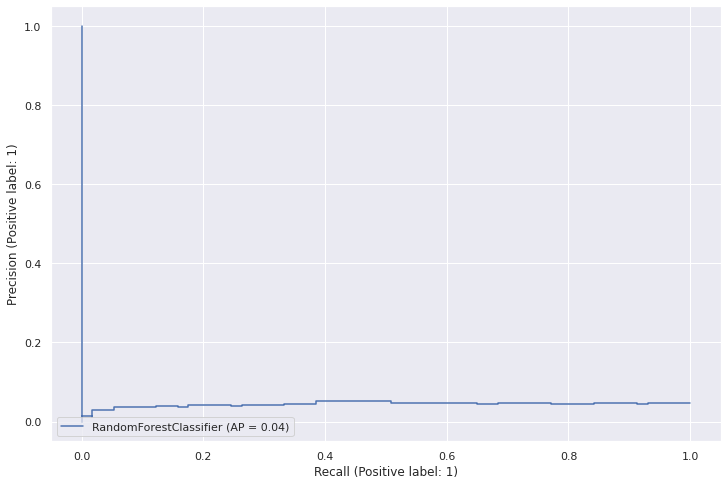

In [65]:
plot_precision_recall_curve(X=X_test, y=y_test, estimator=model)

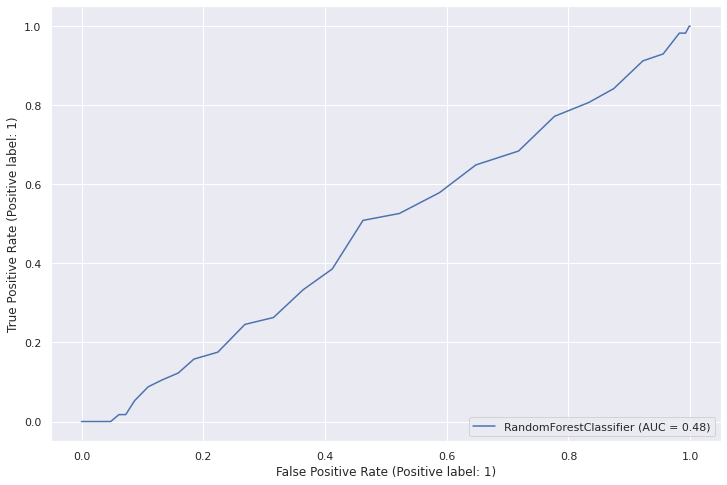

In [66]:
plot_roc_curve(model, X_test, y_test)

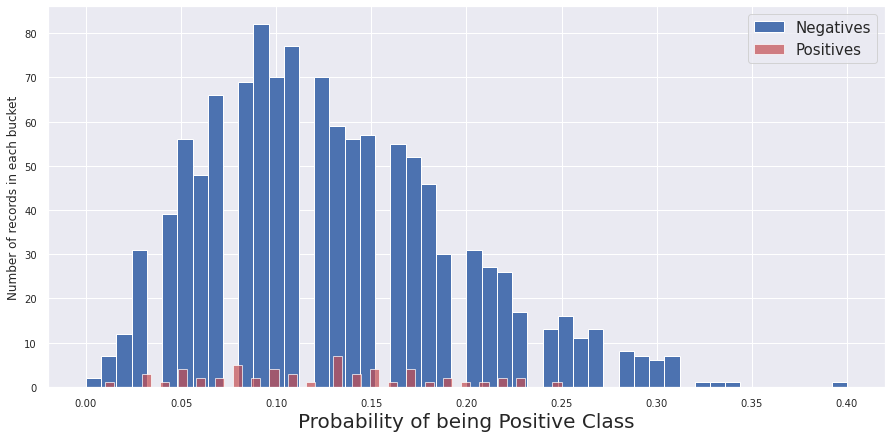

In [67]:
prediction=model.predict_proba(X_test)[:,1]

plt.figure(figsize=(15,7))
plt.hist(prediction[y_test==0], bins=50, label='Negatives')
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=20)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=10, pad=5)
plt.show()

## Model 2

In [68]:
df = df_1.drop(columns=["order_id", "created_at", "created_at_buyer", "created_at_merchant", "due_date", 
                        "created_at_payment", "first_name", "last_name", "email", "name"])

In [69]:
df_train = df[df.dataset_type == "train"]
df_test = df[df.dataset_type == "test"]

In [70]:
X_train = df_train.drop(columns=["dataset_type", "target"])
X_test = df_test.drop(columns=["dataset_type", "target"])
                                          
y_train = df_train["target"]
y_test = df_test["target"]

In [71]:
y_test.value_counts(normalize=True)

0    0.953545
1    0.046455
Name: target, dtype: float64

In [72]:
y_train.value_counts(normalize=True)

0    0.94032
1    0.05968
Name: target, dtype: float64

In [73]:
X_train

,buyer_id,merchant_id,total_price_cents,time_buyer,time_merchant,has_order_before,created_at_day,created_at_dayweek,created_at_time,n_orders_buyer,n_orders_merchant,days_since_last_order,avg_price,max_price,min_price
0,1,1,36995,0,3,0,5,5,16.050000,0,0,-1.0,-1.000000,-1.0,-1.0
1,2,1,46197,0,4,0,6,6,2.300000,0,1,-1.0,-1.000000,-1.0,-1.0
2,3,1,37392,0,4,0,6,6,18.233333,0,2,-1.0,-1.000000,-1.0,-1.0
3,4,1,34974,0,6,0,7,0,23.300000,0,3,-1.0,-1.000000,-1.0,-1.0
4,4,1,45097,14,20,1,22,1,10.033333,1,30,14.0,34974.000000,34974.0,34974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80339,9553,90,244672,11,57,1,12,6,21.100000,2,2,4.0,207781.500000,233602.0,181961.0
80340,9553,90,239938,28,74,1,29,2,21.366667,3,3,17.0,220078.333333,244672.0,181961.0
80342,9790,95,95639,0,50,0,17,4,13.916667,0,0,-1.0,-1.000000,-1.0,-1.0
80343,9855,88,102636,0,77,0,21,1,10.316667,0,0,-1.0,-1.000000,-1.0,-1.0


In [74]:
clf = RandomForestClassifier(random_state=0)

In [75]:
model = clf.fit(X_train, y_train) 

In [76]:
pred = model.predict(X_test)

In [77]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
df_pred = pd.DataFrame(y_test)
df_pred["predictions"] = pred

In [79]:
df_pred

,target,predictions
170,0,0
334,0,0
408,0,0
584,0,0
1721,0,0
...,...,...
80323,0,0
80326,0,0
80341,0,0
80344,0,0


In [80]:
df_pred.target.value_counts()

0    1170
1      57
Name: target, dtype: int64

In [81]:
df_pred.predictions.value_counts()

0    1227
Name: predictions, dtype: int64

In [82]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1170
           1       0.00      0.00      0.00        57

    accuracy                           0.95      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.91      0.95      0.93      1227



In [83]:
pred_proba = model.predict_proba(X_test)

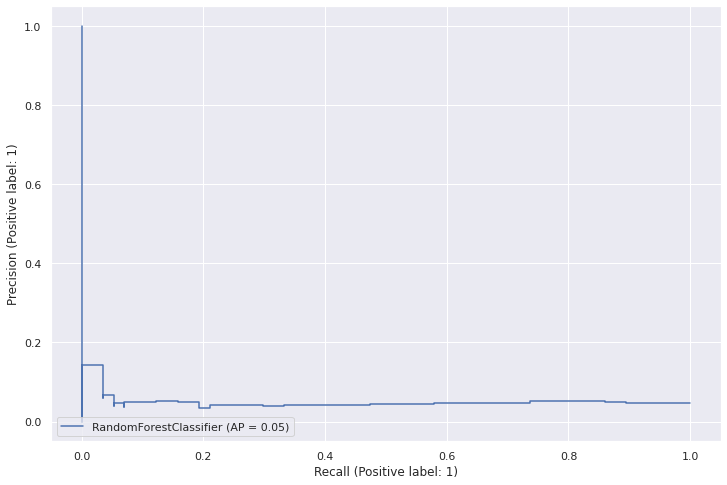

In [84]:
plot_precision_recall_curve(X=X_test, y=y_test, estimator=model)

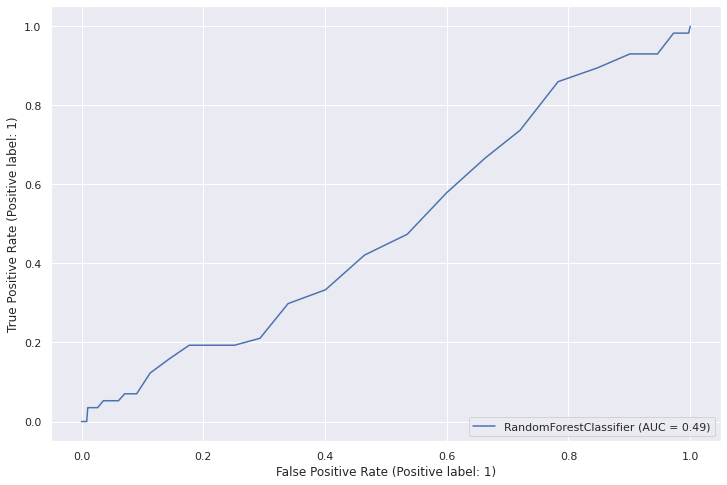

In [85]:
plot_roc_curve(model, X_test, y_test)

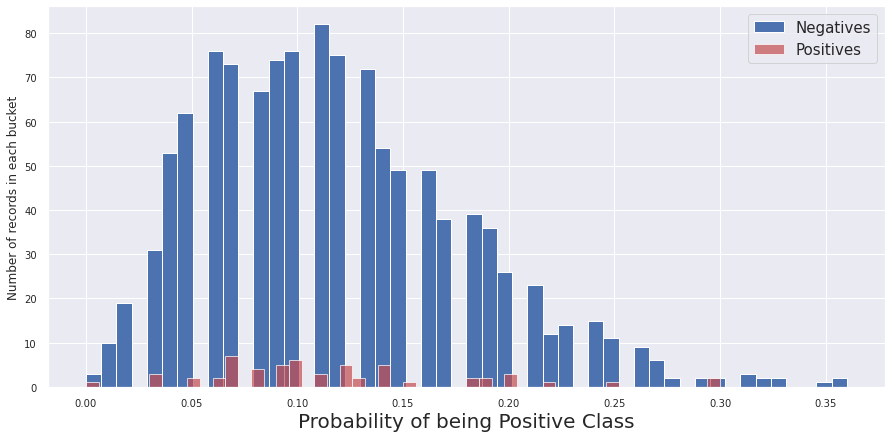

In [86]:
prediction=model.predict_proba(X_test)[:,1]

plt.figure(figsize=(15,7))
plt.hist(prediction[y_test==0], bins=50, label='Negatives')
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=20)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=10, pad=5)
plt.show()

In [87]:
with engine.begin() as connection:
    df_final = pd.read_sql(
        
        """
        WITH orders AS(
            SELECT orders.order_id, 
                   orders.buyer_id, 
                   orders.merchant_id, 
                   orders.total_price_cents, 
                   orders.created_at,
                   EXTRACT(day from orders.created_at) as created_at_day, 
                   EXTRACT(isodow from orders.created_at) as created_at_dayweek, 
                   EXTRACT(hour from orders.created_at) + (EXTRACT(minute from orders.created_at)/60) as created_at_time,
                   CASE WHEN EXTRACT(day from (payment.created_at - decision.due_date)) < 5 THEN 0 ELSE 1 END as target
            
            FROM orders_creation as orders
                LEFT JOIN orders_decision as decision on orders.order_id=decision.order_id
                LEFT JOIN orders_payment as payment ON orders.order_id=payment.order_id
            WHERE decision.decision!='REJECT'
        )
        
        SELECT orders.*, 
                EXTRACT(day from (orders.created_at - buyers.created_at)) as time_buyer,
                EXTRACT(day from (orders.created_at - merchants.created_at)) as time_merchant,
                CASE WHEN EXTRACT(day from (orders.created_at - buyers.created_at)) = 0 THEN 0 ELSE 1 END as has_order_before,
                (COUNT(*) OVER w) AS n_orders_buyer,
                (COUNT(*) OVER w1) AS n_orders_merchant,
                EXTRACT(day from (
                    (orders.created_at - lag(orders.created_at) OVER (
                        PARTITION by orders.buyer_id ORDER BY orders.created_at ASC)))) AS days_since_last_order,
                AVG(orders.total_price_cents) OVER w as avg_price,
                MAX(orders.total_price_cents) OVER w as max_price,
                MIN(orders.total_price_cents) OVER w as min_price
                

        FROM orders
        LEFT JOIN buyers on orders.buyer_id = buyers.buyer_id
        LEFT JOIN merchants on orders.merchant_id = merchants.merchant_id
        WINDOW w AS (
                PARTITION BY orders.buyer_id
                ORDER BY orders.created_at ASC
                ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING),
              w1 AS (
                PARTITION BY orders.merchant_id
                 ORDER BY orders.created_at ASC
                 ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING)
        
         """, connection)

In [88]:
df_final.sort_values("order_id")

,order_id,buyer_id,merchant_id,total_price_cents,created_at,created_at_day,created_at_dayweek,created_at_time,target,time_buyer,time_merchant,has_order_before,n_orders_buyer,n_orders_merchant,days_since_last_order,avg_price,max_price,min_price
0,1,1,1,36995,2019-01-05 16:03:48.065322,5.0,6.0,16.050000,1,0.0,3.0,0,0,0,NaN,NaN,NaN,NaN
1,2,2,1,46197,2019-01-06 02:18:23.014051,6.0,7.0,2.300000,0,0.0,4.0,0,0,1,NaN,NaN,NaN,NaN
2,3,3,1,37392,2019-01-06 18:14:18.912525,6.0,7.0,18.233333,0,0.0,4.0,0,0,2,NaN,NaN,NaN,NaN
3,4,4,1,34974,2019-01-07 23:18:11.857542,7.0,1.0,23.300000,0,0.0,6.0,0,0,3,NaN,NaN,NaN,NaN
171,5,5,1,41176,2019-01-08 10:44:52.550876,8.0,2.0,10.733333,0,0.0,6.0,0,0,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45611,80343,4725,23,202679,2022-02-27 07:58:03.883121,27.0,7.0,7.966667,1,454.0,780.0,1,9,1563,82.0,180071.222222,217159.0,129992.0
63221,80344,6934,75,16162,2022-02-27 19:02:59.164577,27.0,7.0,19.033333,0,277.0,282.0,1,12,250,59.0,17243.500000,20509.0,12322.0
61087,80345,6648,41,20557,2022-02-27 22:47:24.582462,27.0,7.0,22.783333,0,300.0,671.0,1,3,715,223.0,16510.333333,20543.0,14425.0
59283,80346,6406,40,13269,2022-02-27 23:15:56.515892,27.0,7.0,23.250000,0,317.0,676.0,1,12,3423,129.0,10479.833333,13270.0,8048.0


In [89]:
df_final.target.value_counts()

0    73963
1     4677
Name: target, dtype: int64